<a href="https://colab.research.google.com/github/tushargupta123/deep-learning-practice/blob/main/cat_vs_dog_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:12<00:00, 180MB/s]
100% 1.06G/1.06G [00:12<00:00, 92.3MB/s]


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [9]:
# generators
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/dogs_vs_cats/train',
    labels='inferred',
    label_mode='int',   # it will label cats as 0 and dogs as 1
    batch_size=32,      # it will take small small data as one time
    image_size=(256,256)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/dogs_vs_cats/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [10]:
# Normalization of data
def process(image,label):
  image = tf.cast(image/255.,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [11]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 64s 80ms/step - loss: 0.5921 - accuracy: 0.6770 - val_loss: 0.4944 - val_accuracy: 0.7694
Epoch 2/10
625/625 [==============================] - 51s 81ms/step - loss: 0.4569 - accuracy: 0.7812 - val_loss: 0.4813 - val_accuracy: 0.7860
Epoch 3/10
625/625 [==============================] - 53s 85ms/step - loss: 0.3464 - accuracy: 0.8470 - val_loss: 0.4426 - val_accuracy: 0.8102
Epoch 4/10
625/625 [==============================] - 55s 87ms/step - loss: 0.2094 - accuracy: 0.9114 - val_loss: 0.6625 - val_accuracy: 0.7864
Epoch 5/10
625/625 [==============================] - 51s 81ms/step - loss: 0.1175 - accuracy: 0.9539 - val_loss: 0.7480 - val_accuracy: 0.7828
Epoch 6/10
625/625 [==============================] - 51s 81ms/step - loss: 0.0681 - accuracy: 0.9746 - val_loss: 1.0492 - val_accuracy: 0.7962
Epoch 7/10
625/625 [==============================] - 74s 118ms/step - loss: 0.0513 - accuracy: 0.9827 - val_loss: 1.0455 - val_accuracy

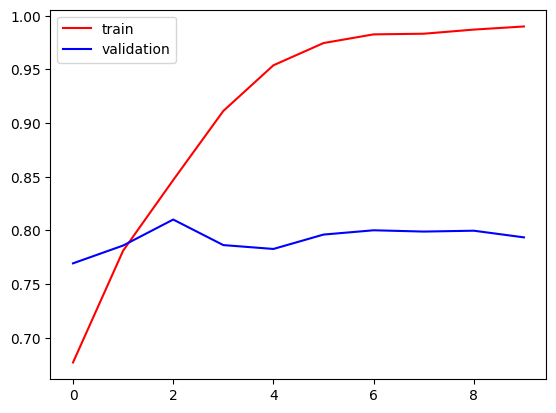

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

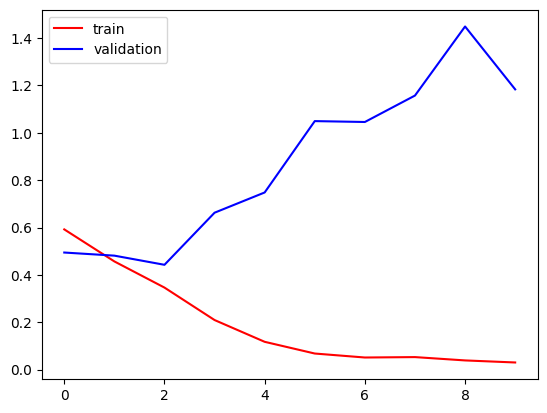

In [14]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()